### Trial 1 GP

**Business Problem at hand:**
Supermarkets require forecasts to support their strategic development, make tactical decisions, and manage their demand and supply planning processes in order to avoid customer service issues and high inventory costs.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/m5-forecasting-accuracy/calendar.csv
/kaggle/input/m5-forecasting-accuracy/sample_submission.csv
/kaggle/input/m5-forecasting-accuracy/sell_prices.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv


### Necessary Imports

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [3]:
calendar = pd.read_csv('/kaggle/input/m5-forecasting-accuracy/calendar.csv')
sample_submission = pd.read_csv('/kaggle/input/m5-forecasting-accuracy/sample_submission.csv')
sell_prices = pd.read_csv('/kaggle/input/m5-forecasting-accuracy/sell_prices.csv') 
sales_train_val = pd.read_csv('/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv') 
sales_train_eval = pd.read_csv('/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv') 

In [4]:
sell_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


### Helper Function to minimize memory usage

In [5]:
# def memory_optimizer(df, verbose=True):
#     numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#     start_mem = df.memory_usage().sum() / 1024**2    
#     for col in df.columns:
#         col_type = df[col].dtypes
#         if col_type in numerics: 
#             c_min = df[col].min()
#             c_max = df[col].max()
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     df[col] = df[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     df[col] = df[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     df[col] = df[col].astype(np.int64)  
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     df[col] = df[col].astype(np.float32)
#                 else:
#                     df[col] = df[col].astype(np.float64)    
#     end_mem = df.memory_usage().sum() / 1024**2
#     if verbose: print('({:.1f}% reduction)'.format(100 * (start_mem - end_mem) / start_mem))
#     return df

### Helper Function to process dates

In [6]:
# def handle_dates(df):
#     cols = df.dtypes.index.tolist()
#     types = df.dtypes.values.tolist()
#     for i,t in enumerate(types):
#         if ((t == np.object) & (cols[i] == 'date')):
#             df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
#         else:
#             pass
#     return df

### Function Implementation

In [7]:
# calendar = memory_optimizer(calendar)
# sell_prices = memory_optimizer(sell_prices)
# sales_train_val = memory_optimizer(sales_train_val)
# sales_train_eval = memory_optimizer(sales_train_eval)

In [8]:
#calendar=handle_dates(calendar)
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


## Exploratory Data Analysis

In [9]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [10]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [11]:
sales_train_val.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


### This seems rather complex, so let's start at the beginning
Say some useless shit about store distribution blah blah blah

In [12]:
group = sales_train_val.groupby(['state_id','store_id','cat_id','dept_id'],as_index=False)['item_id'].count().dropna()
group.rename(columns={"item_id": "item_count"})

,state_id,store_id,cat_id,dept_id,item_count
0,CA,CA_1,FOODS,FOODS_1,216
1,CA,CA_1,FOODS,FOODS_2,398
2,CA,CA_1,FOODS,FOODS_3,823
3,CA,CA_1,HOBBIES,HOBBIES_1,416
4,CA,CA_1,HOBBIES,HOBBIES_2,149
...,...,...,...,...,...
65,WI,WI_3,FOODS,FOODS_3,823
66,WI,WI_3,HOBBIES,HOBBIES_1,416
67,WI,WI_3,HOBBIES,HOBBIES_2,149
68,WI,WI_3,HOUSEHOLD,HOUSEHOLD_1,532


In [13]:
group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   state_id  70 non-null     object
 1   store_id  70 non-null     object
 2   cat_id    70 non-null     object
 3   dept_id   70 non-null     object
 4   item_id   70 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.3+ KB


In [14]:
fig = px.treemap(group, path=[px.Constant("all"), 'state_id', 'store_id', 'cat_id', 'dept_id'], values='item_id')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

2olly ay 5ara 3n n this function erza3 feeha l id w shoof l sales

In [15]:
sales_train_val.id.nunique()

30490

In [16]:
def sales_plotter_for_item_id(item_id):
    d_cols = [c for c in sales_train_val.columns if 'd_' in c] 
    sales_train_val.loc[sales_train_val['id'] == item_id] \
    .set_index('id')[d_cols] \
    .T \
    .plot(figsize=(20, 10))
    
    plt.title("Number of Sales for each Day",fontsize=14)
    plt.xlabel("Day",fontsize=12)
    plt.ylabel("Number of Sales",fontsize=12)
    plt.show()   

In [17]:
sales_train_val.sample(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
9946,HOUSEHOLD_1_239_CA_4_validation,HOUSEHOLD_1_239,HOUSEHOLD_1,HOUSEHOLD,CA_4,CA,0,0,0,0,...,0,2,2,1,0,0,1,0,2,0
4030,HOUSEHOLD_1_426_CA_2_validation,HOUSEHOLD_1_426,HOUSEHOLD_1,HOUSEHOLD,CA_2,CA,0,0,0,0,...,0,0,2,1,0,1,0,1,2,2
26050,FOODS_1_048_WI_2_validation,FOODS_1_048,FOODS_1,FOODS,WI_2,WI,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
9748,HOUSEHOLD_1_038_CA_4_validation,HOUSEHOLD_1_038,HOUSEHOLD_1,HOUSEHOLD,CA_4,CA,1,0,1,1,...,1,0,1,1,0,1,0,1,1,0
22531,HOUSEHOLD_2_092_WI_1_validation,HOUSEHOLD_2_092,HOUSEHOLD_2,HOUSEHOLD,WI_1,WI,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


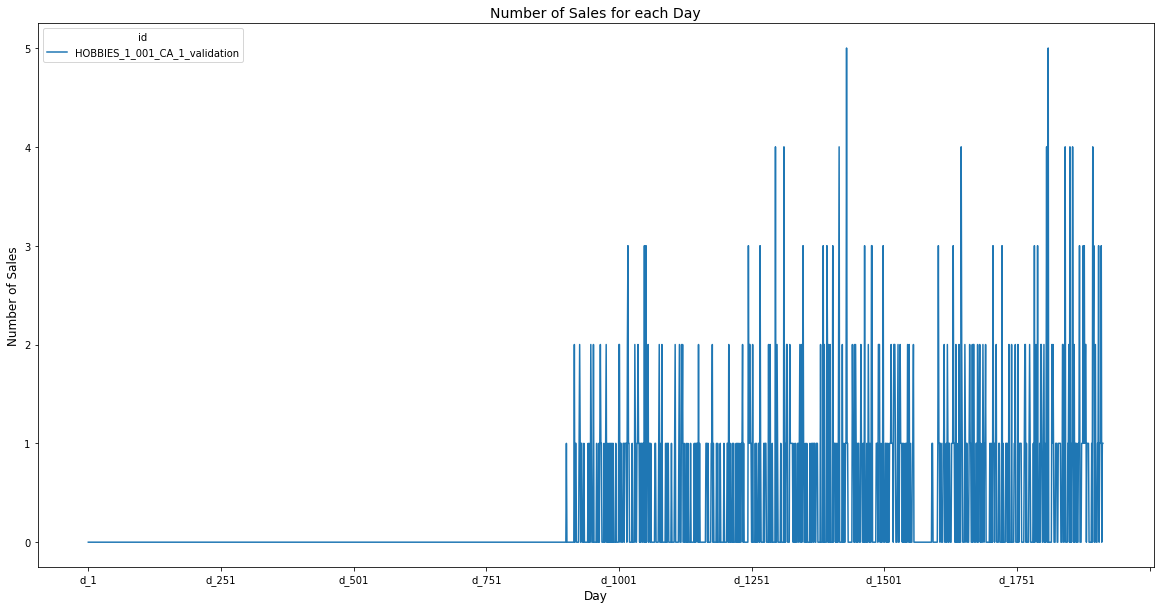

In [18]:
sales_plotter_for_item_id('HOBBIES_1_001_CA_1_validation')

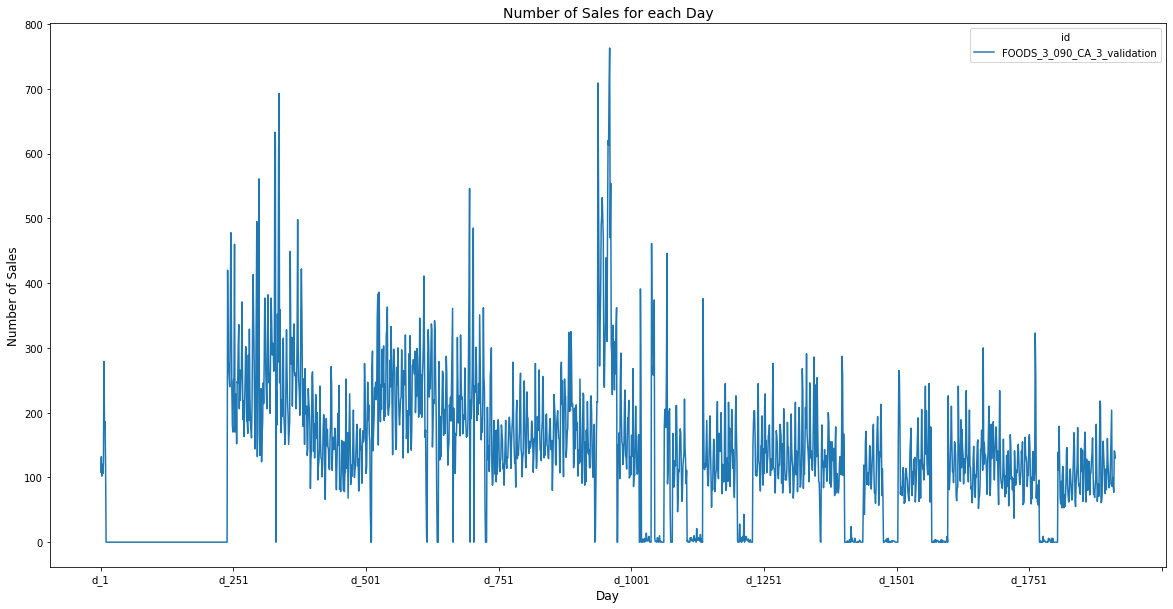

In [19]:
sales_plotter_for_item_id('FOODS_3_090_CA_3_validation')

In [20]:
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

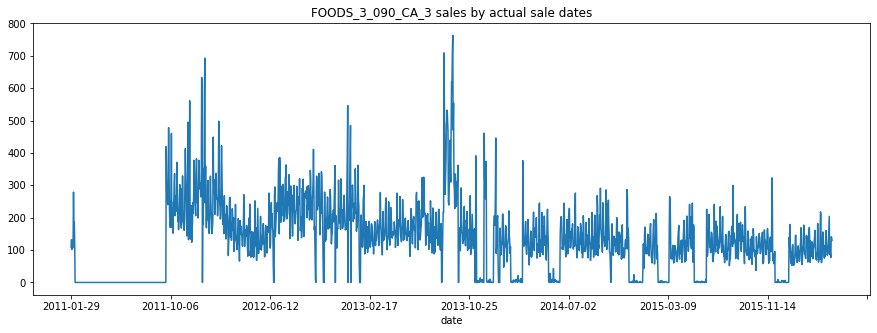

In [21]:
# It’s the same plot above but We just wnt to show the number of days as actual dates
# we can use calendar data to look at dates of days
# Merge calendar on our items' data
d_cols = [c for c in sales_train_val.columns if 'd_' in c]
example = sales_train_val.loc[sales_train_val['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].T
example = example.rename(columns={8412:'FOODS_3_090_CA_3'}) # Name it correctly
example = example.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example = example.merge(calendar, how='left', validate='1:1')
example.set_index('date')['FOODS_3_090_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='FOODS_3_090_CA_3 sales by actual sale dates')
plt.show()

In [22]:
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

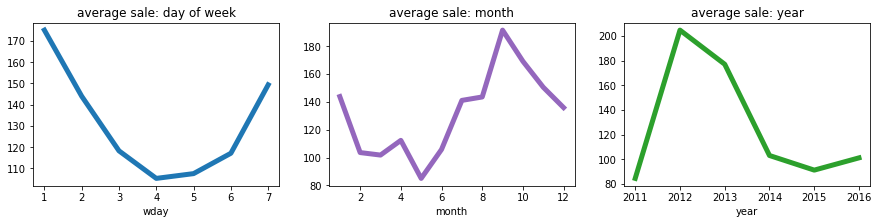

In [23]:
# Now We are trying to see the difference between trending and seasonality 
# From example we can find weekly and annual trends
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
#example.groupby('wday').mean()['FOODS_3_090_CA_3']
example.groupby('wday').mean()['FOODS_3_090_CA_3'] \
        .plot(kind='line',
              title='average sale: day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)
example.groupby('month').mean()['FOODS_3_090_CA_3'] \
        .plot(kind='line',
              title='average sale: month',
              lw=5,
              color=color_pal[4],

              ax=ax2)
example.groupby('year').mean()['FOODS_3_090_CA_3'] \
        .plot(kind='line',
              lw=5,
              title='average sale: year',
              color=color_pal[2],

              ax=ax3)

plt.show()

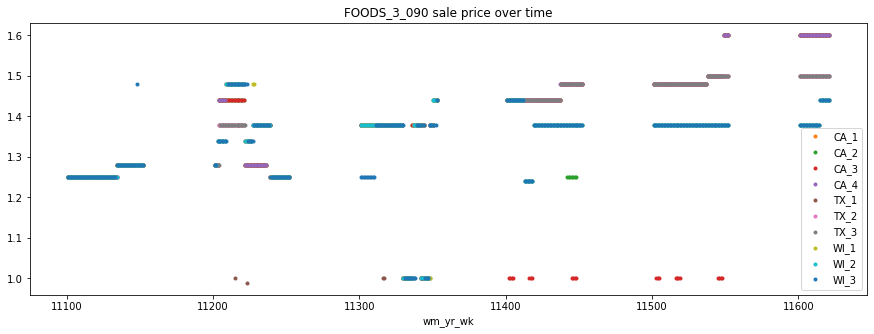

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))
stores = []
for store, d in sell_prices.query('item_id == "FOODS_3_090"').groupby('store_id'):
    d.plot(x='wm_yr_wk',
          y='sell_price',
          style='.',
          color=next(color_cycle),
          figsize=(15, 5),
          title='FOODS_3_090 sale price over time',
         ax=ax,
          legend=store)
    stores.append(store)
    plt.legend()
plt.legend(stores)
plt.show()

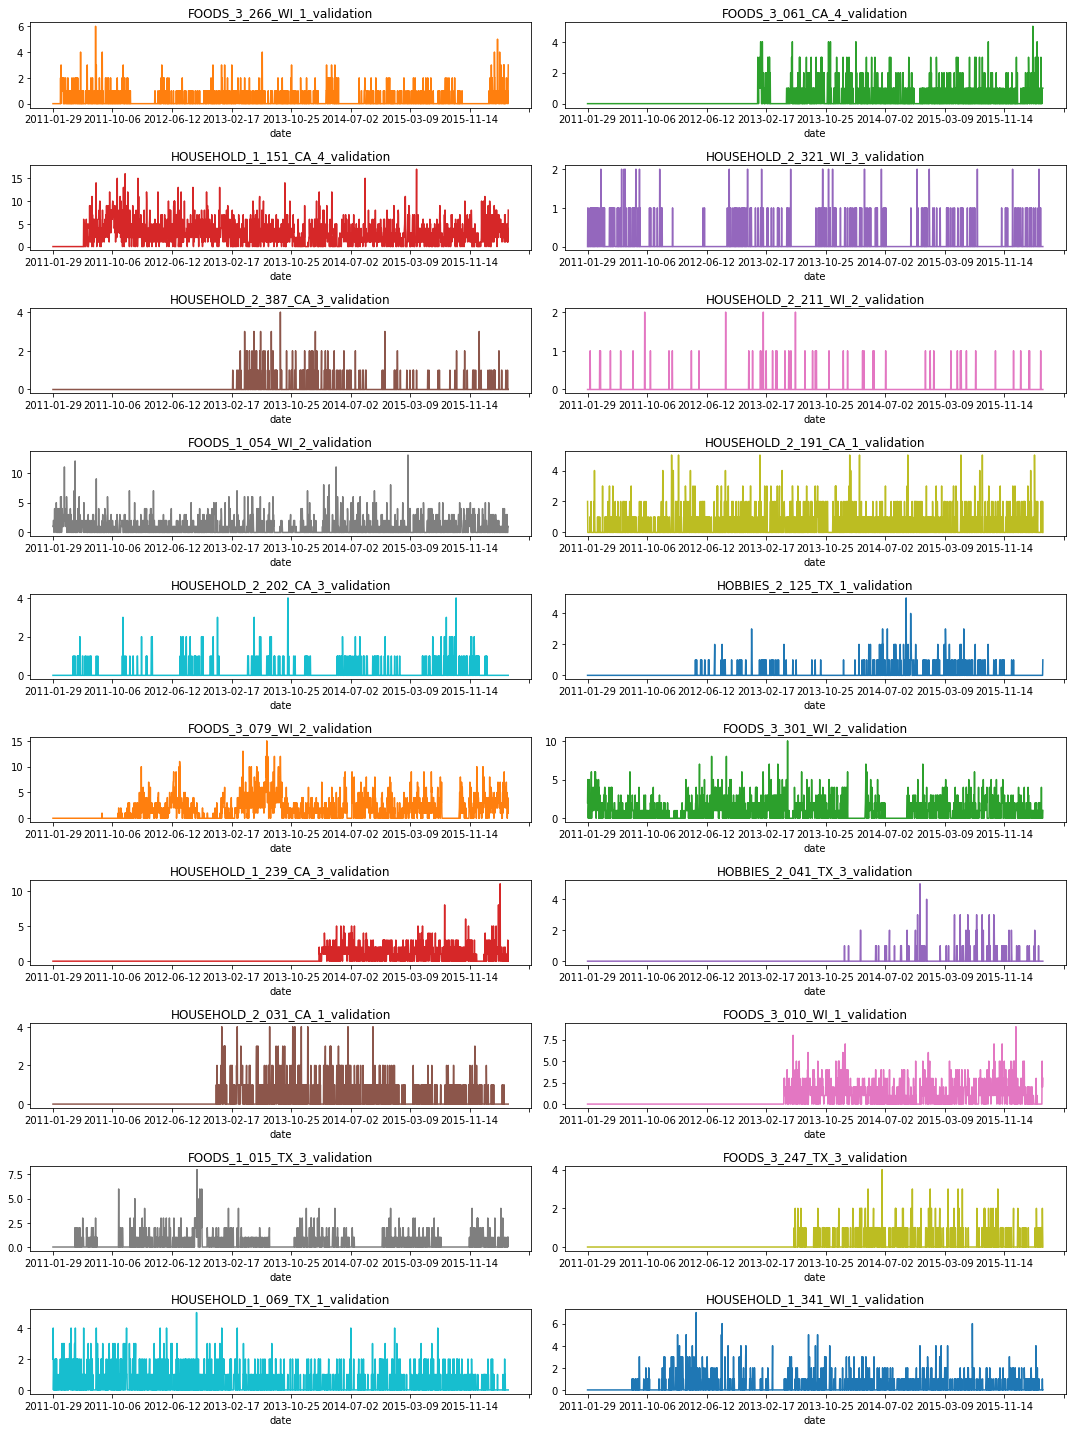

In [25]:
twenty_examples = sales_train_val.sample(20) \
        .set_index('id')[d_cols] \
    .T \
    .merge(calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')
fig, axs = plt.subplots(10, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for item in twenty_examples.columns:
    twenty_examples[item].plot(title=item,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

## Explore Categories 

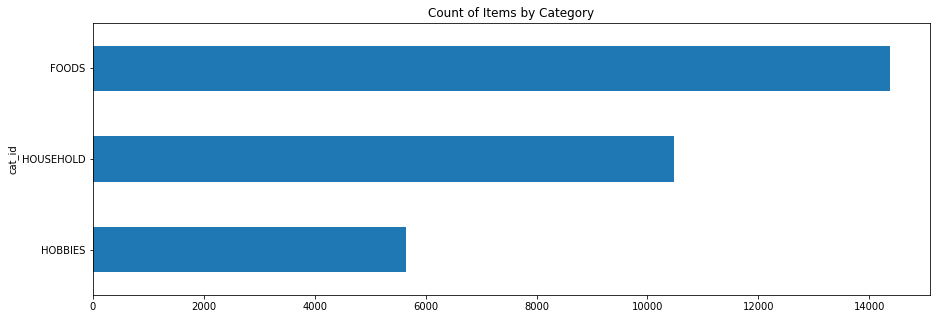

In [26]:
sales_train_val.groupby('cat_id').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()

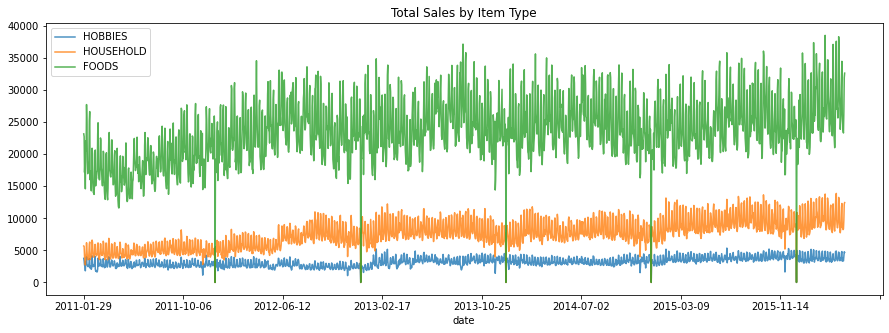

In [27]:
past_sales = sales_train_val.set_index('id')[d_cols] \
    .T \
    .merge(calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1')\
    .set_index('date')

for i in sales_train_val['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by Item Type')
plt.legend(sales_train_val['cat_id'].unique())
plt.show()

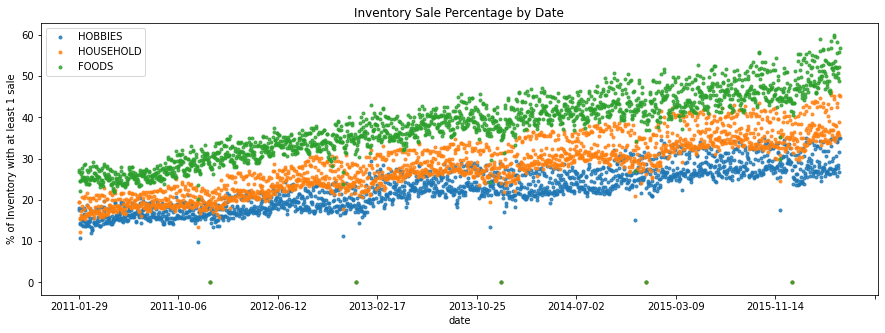

In [28]:
past_sales_clipped = past_sales.clip(0, 1) # 0 -> not selling, 1 -> selling
for i in sales_train_val['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    (past_sales_clipped[items_col] \
        .mean(axis=1) * 100) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Inventory Sale Percentage by Date',
              style='.')
plt.ylabel('% of Inventory with at least 1 sale')
plt.legend(sales_train_val['cat_id'].unique())
plt.show()

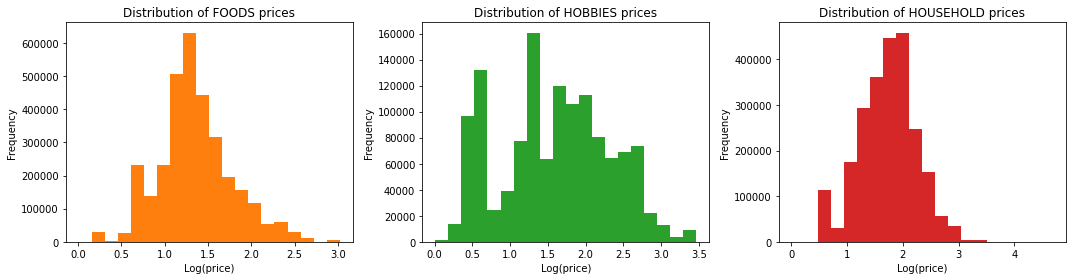

In [29]:
sell_prices['Category'] = sell_prices['item_id'].str.split('_', expand=True)[0]
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
i = 0
for cat, d in sell_prices.groupby('Category'):
    ax = d['sell_price'].apply(np.log1p) \
        .plot(kind='hist',
                         bins=20,
                         title=f'Distribution of {cat} prices',
                         ax=axs[i],
                                         color=next(color_cycle))
    ax.set_xlabel('Log(price)')
    i += 1
plt.tight_layout()

### Explore Stores

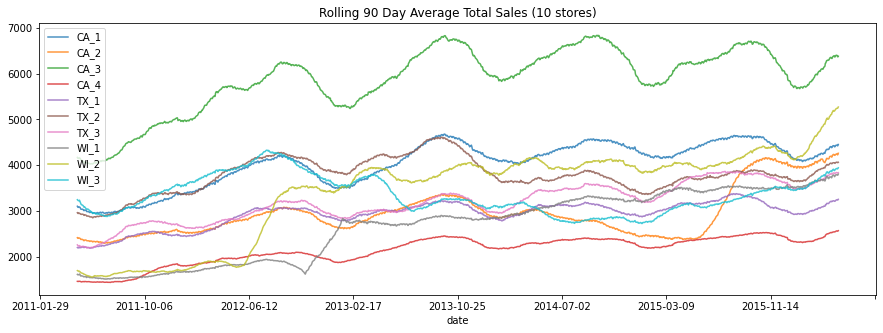

In [30]:
#10 unique stores.

store_list = sell_prices['store_id'].unique()
# loop on each store and compute sumtion of sales all products and compute average for each 90 days
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(90).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Rolling 90 Day Average Total Sales (10 stores)')
plt.legend(store_list)
plt.show()

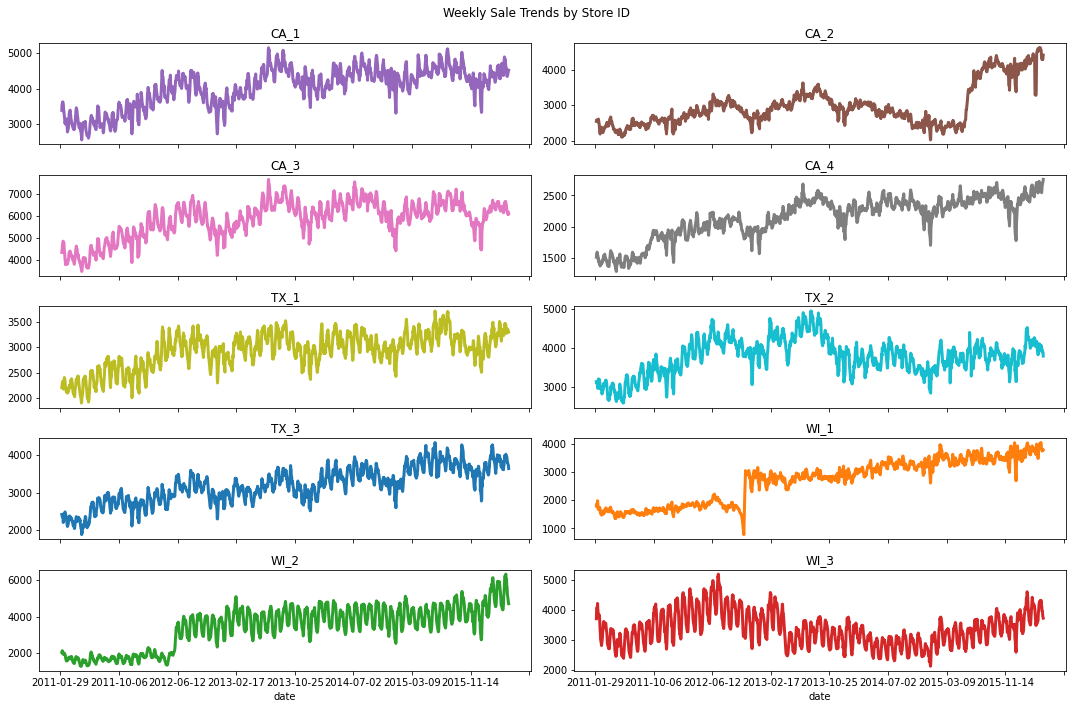

In [31]:
# plot a rolling 7 day(weekly) total demand count by store. 
fig, axes = plt.subplots(5, 2, figsize=(15, 10), sharex=True)
axes = axes.flatten()
ax_idx = 0
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(7).mean() \
        .plot(alpha=1,
              ax=axes[ax_idx],
              title=s,
              lw=3,
              color=next(color_cycle))
    ax_idx += 1
# plt.legend(store_list)
plt.suptitle('Weekly Sale Trends by Store ID')
plt.tight_layout()
plt.show()

In [32]:
print('The lowest sale date was:', past_sales.sum(axis=1).sort_values().index[0],
     'with', past_sales.sum(axis=1).sort_values().values[0], 'sales')
print('The highest sale date was:', past_sales.sum(axis=1).sort_values(ascending=False).index[0],
     'with', past_sales.sum(axis=1).sort_values(ascending=False).values[0], 'sales')

The lowest sale date was: 2012-12-25 with 11 sales
The highest sale date was: 2016-03-06 with 57218 sales


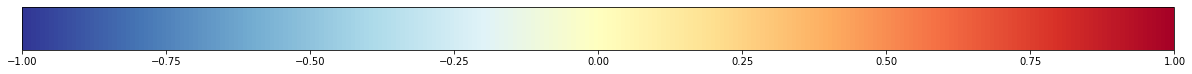

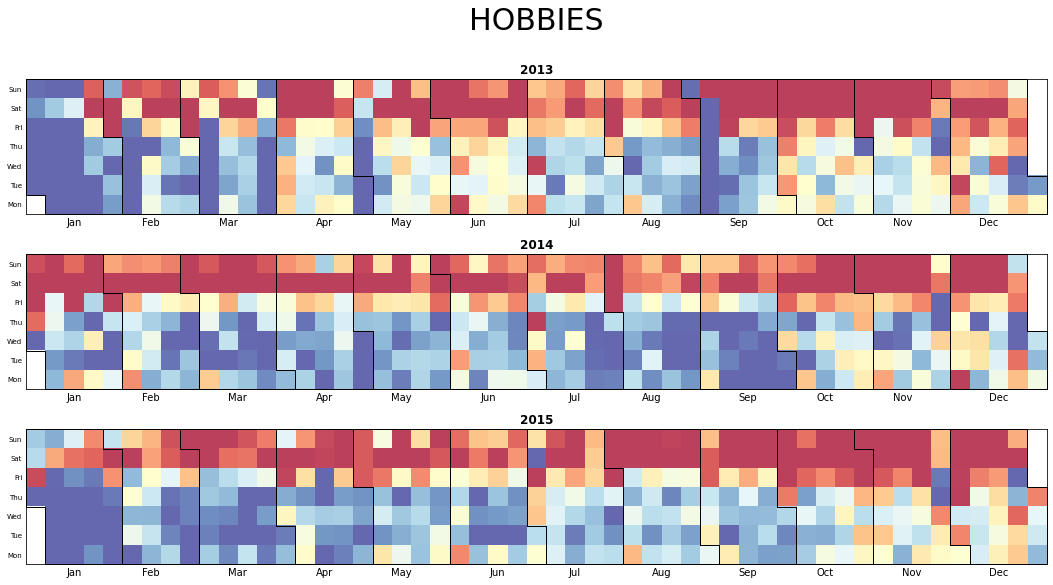

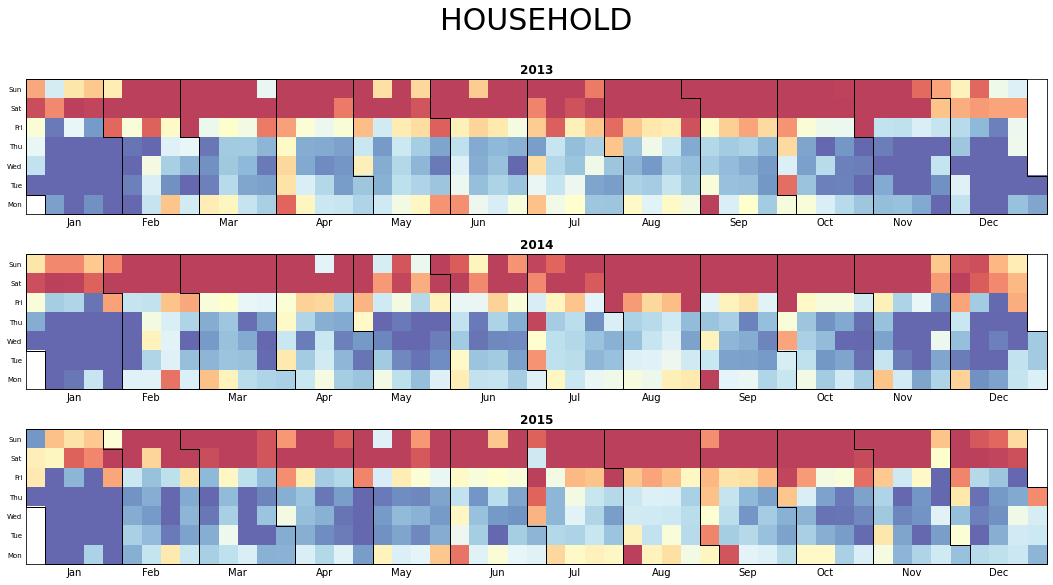

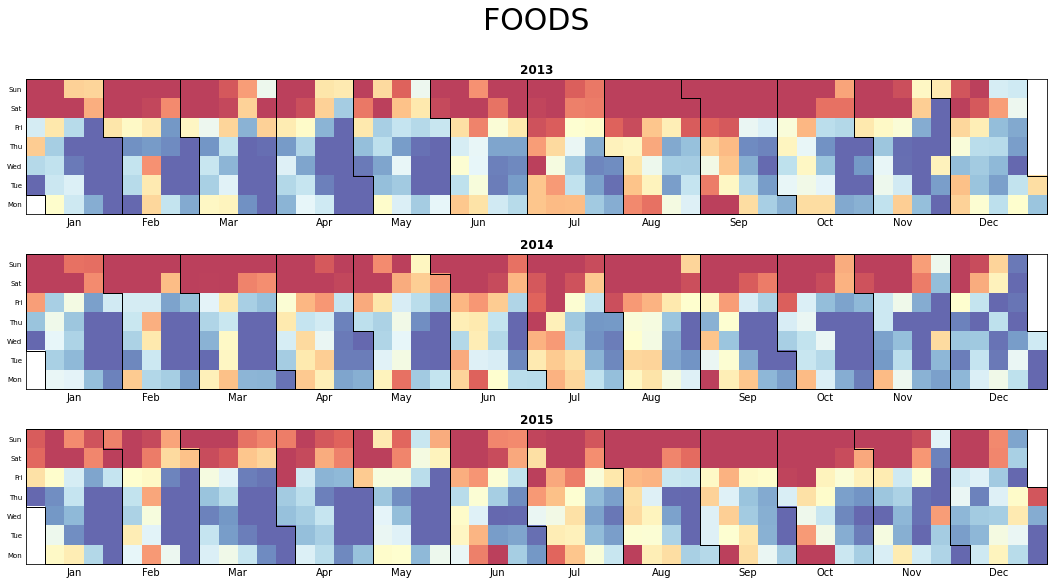

In [33]:
#Sales Heatmap Calendar
from matplotlib.patches import Polygon
from datetime import datetime
from dateutil.relativedelta import relativedelta

def calmap(ax, year, data):
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders
    xticks, labels = [], []
    start = datetime(year,1,1).weekday()
    for month in range(1,13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]
        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_title("{}".format(year), weight="semibold")
    
    # Clearing first and last day from the data
    valid = datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    # Showing data
    ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=-1, vmax=1,
              cmap="RdYlBu_r", origin="lower", alpha=.75)
    
    
import pylab as pl
import numpy as np

a = np.array([[-1,1]])
pl.figure(figsize=(20, 1))
img = pl.imshow(a, cmap="RdYlBu_r")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation="horizontal", cax=cax)
pl.savefig("colorbar.pdf")  
    
from sklearn.preprocessing import StandardScaler
sscale = StandardScaler()
past_sales.index = pd.to_datetime(past_sales.index)
for i in sales_train_val['cat_id'].unique():
    fig, axes = plt.subplots(3, 1, figsize=(20, 8))
    items_col = [c for c in past_sales.columns if i in c]
    
    sales2013 = past_sales.loc[past_sales.index.isin(pd.date_range('31-Dec-2012',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2013.values.reshape(-1, 1)))
    calmap(axes[0], 2013, vals.reshape(53,7).T)
    sales2014 = past_sales.loc[past_sales.index.isin(pd.date_range('30-Dec-2013',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2014.values.reshape(-1, 1)))
    calmap(axes[1], 2014, vals.reshape(53,7).T)
    sales2015 = past_sales.loc[past_sales.index.isin(pd.date_range('29-Dec-2014',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2015.values.reshape(-1, 1)))
    calmap(axes[2], 2015, vals.reshape(53,7).T)
    
    plt.suptitle(i, fontsize=30, x=0.5, y=1.01)
    plt.tight_layout()
    plt.show()

### Data Preprocessing 

In [34]:
# Add zero sales for the remaining days 1914-1941 in train sales
#sales_train_eval
#sales_train_val
train = sales_train_val.copy()
for d in range(1914-1941):
    col = 'd_' + str(d)
    train[col] = 0
    train[col] = train[col].astype(np.int16)

In [35]:
#Downcast in order to save memory
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    return df  

train = downcast(train)
sell_prices = downcast(sell_prices)
calendar = downcast(calendar)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [36]:
train.shape

(30490, 1919)

In [37]:
#pd.melt(train, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sold').dropna()

In [38]:
train= pd.melt(train, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sold').dropna()

In [39]:
train = pd.merge(train, calendar, on='d', how='left')
train = pd.merge(train, sell_prices, on=['store_id','item_id','wm_yr_wk'], how='left') 

In [40]:
#drop_indices = np.random.choice(train.index, 46000000, replace=False)
train = train.drop(np.arange(46000000))

In [41]:
train['revenue'] = train['sold']*train['sell_price'].astype(np.float32)

In [42]:
# #Store the categories along with their codes
# d_id = dict(zip(train.id.cat.codes, train.id))
# d_item_id = dict(zip(train.item_id.cat.codes, train.item_id))
# d_dept_id = dict(zip(train.dept_id.cat.codes, train.dept_id))
# d_cat_id = dict(zip(train.cat_id.cat.codes, train.cat_id))
# d_store_id = dict(zip(train.store_id.cat.codes, train.store_id))
# d_state_id = dict(zip(train.state_id.cat.codes, train.state_id))

In [43]:
#1
train.d = train['d'].apply(lambda x: x.split('_')[1]).astype(np.int16)
cols = train.dtypes.index.tolist()
types = train.dtypes.values.tolist()
for i,type in enumerate(types):
    if type.name == 'category':
        train[cols[i]] = train[cols[i]].cat.codes
        
#2
train.drop('date',axis=1,inplace=True)

In [44]:
# # We will use lag features

# lags = [1,2,3,6,12,24,36]
# for lag in lags:
#     train['sold_lag_'+str(lag)] = train.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],as_index=False)['sold'].shift(lag).astype(np.float16)

In [45]:
# train['iteam_sold_avg'] = train.groupby('item_id')['sold'].transform('mean').astype(np.float16)
# train['state_sold_avg'] = train.groupby('state_id')['sold'].transform('mean').astype(np.float16)
# train['store_sold_avg'] = train.groupby('store_id')['sold'].transform('mean').astype(np.float16)
# train['cat_sold_avg'] = train.groupby('cat_id')['sold'].transform('mean').astype(np.float16)
# train['dept_sold_avg'] = train.groupby('dept_id')['sold'].transform('mean').astype(np.float16)
# train['cat_dept_sold_avg'] = train.groupby(['cat_id','dept_id'])['sold'].transform('mean').astype(np.float16)
# train['store_item_sold_avg'] = train.groupby(['store_id','item_id'])['sold'].transform('mean').astype(np.float16)
# train['cat_item_sold_avg'] = train.groupby(['cat_id','item_id'])['sold'].transform('mean').astype(np.float16)
# train['dept_item_sold_avg'] = train.groupby(['dept_id','item_id'])['sold'].transform('mean').astype(np.float16)
# train['state_store_sold_avg'] = train.groupby(['state_id','store_id'])['sold'].transform('mean').astype(np.float16)
# train['state_store_cat_sold_avg'] = train.groupby(['state_id','store_id','cat_id'])['sold'].transform('mean').astype(np.float16)
# train['store_cat_dept_sold_avg'] = train.groupby(['store_id','cat_id','dept_id'])['sold'].transform('mean').astype(np.float16)

In [46]:
import gc

In [47]:
# train.to_pickle('data.pkl')
# del train
# gc.collect();

In [48]:
import pickle

In [49]:
# data = pd.read_pickle('data.pkl')

In [50]:
#train.head()

In [51]:
#train['rolling_sold_mean'] = train.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold'].transform(lambda x: x.rolling(window=7).mean()).astype(np.float16)

In [52]:
#train['expanding_sold_mean'] = train.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold'].transform(lambda x: x.expanding(2).mean()).astype(np.float16)

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
train.isnull().sum()

id                  0
item_id             0
dept_id             0
cat_id              0
store_id            0
state_id            0
d                   0
sold                0
wm_yr_wk            0
weekday             0
wday                0
month               0
year                0
event_name_1        0
event_type_1        0
event_name_2        0
event_type_2        0
snap_CA             0
snap_TX             0
snap_WI             0
sell_price      50358
Category            0
revenue         50358
dtype: int64

In [55]:
train.dropna(inplace=True)

In [56]:
train.reset_index(inplace=True)

In [57]:
x_train = train.iloc[:5500000,].drop('sold',axis=1)
y_train = train.iloc[:5500000,]['sold']
x_test = train.iloc[5500000:,].drop('sold',axis=1)
y_test = train.iloc[5500000:,]['sold']

In [58]:
#from sklearn.preprocessing import MinMaxScaler

In [59]:
# sc = MinMaxScaler(feature_range = (0, 1))
# train = sc.fit_transform(train)

In [60]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RepeatVector,TimeDistributed
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import layers

In [61]:
x_train = np.array(x_train).reshape((x_train.shape[0], x_train.shape[1], 1))
#y_train = np.array(y_train).reshape((y_train.shape[0], y_train.shape[1], 1))
x_test = np.array(x_test).reshape((x_test.shape[0], x_test.shape[1], 1))
#y_test = np.array(y_test).reshape((y_test.shape[0], y_test.shape[1], 1))

In [62]:
model = Sequential([layers.Input((x_train.shape[1], x_train.shape[2])),
                    layers.LSTM(32),
                    layers.Dense(16, activation='relu'),
                    layers.Dense(8, activation='relu'),
                    layers.Dense(1)])
model.compile(optimizer='adam', loss='mse',metrics=['mean_squared_error'])

2022-09-21 18:04:35.701655: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1,verbose=1)

2022-09-21 18:04:37.151023: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


171875/171875 [==============================] - 2839s 17ms/step - loss: 0.4331 - mean_squared_error: 0.4331 - val_loss: 0.0653 - val_mean_squared_error: 0.0653
